# 3MTT AI-Powered Solution Knowledge Showcase
<hr><hr>

## Fraud Detection Model Using Random Forest Classifier
<hr>

### 1. Problem Definition
Fraud detection involves identifying transactions that are potentially fraudulent, which is crucial in industries like banking and e-commerce. We'll build a binary classification model that predicts whether a transaction is fraudulent (1) or not (0).

### 2. Dataset & Source
We'll use the popular "Credit Card Fraud Detection" dataset from Kaggle. It contains:

- 284,807 transactions
- 492 frauds (only ~0.17% --> high class imbalance) <br>

Features are anonymized using PCA (V1, V2, ..., V28), plus Time, Amount, and Class.

### 3. Tools and Libraries
For training of this model, we'll use:

- Python
- Pandas for data handling
- Scikit-learn for modeling
- Matplotlib/Seaborn for visualization
- RandomForest for predictive modeling

## *Let's Start...*

In [5]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [7]:
# load the dataset
df = pd.read_csv('creditcard.csv')

## Explore the Dataset

In [8]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
# general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
df.shape

(284807, 31)

## Data Cleaning

In [11]:
# check for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**Comment**: We have no missing values in our dataset. So we're good

In [12]:
# check for duplicate rows
df.duplicated().sum()

np.int64(1081)

**Comment**: We have *1081* duplicate rows. So we're going to keep first and drop others.

In [13]:
# drop duplicate rows but keep the first row
df2 = df.drop_duplicates(keep='first')

In [14]:
# check for duplicates again
df2.duplicated().sum()

np.int64(0)

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

In [18]:
df2.shape[0]

283726

**Comment**: We now have *283726* rows after dropping duplicate rows. This is what we will use for building our model

## Explore the Class Balance

Class
0    283253
1       473
Name: count, dtype: int64


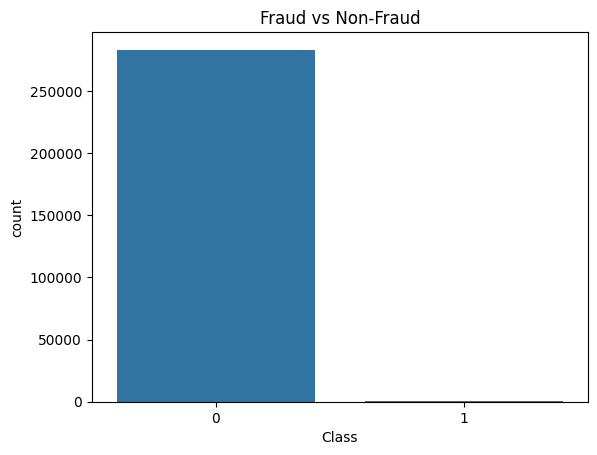

In [20]:
# explore the class balance between fraudulent and non-fraudulent transactions and plot on a chart
print(df2['Class'].value_counts())
sns.countplot(x='Class', data=df2)
plt.title("Fraud vs Non-Fraud")
plt.show()

**Comment**: From the chart above we see that we have *473* fraudulent transactions and *283253* non-fraudulent transactions

## Data Preprocessing

In [24]:
# separating the features from the target (class), to get our independent variables
X = df2.drop(['Class', 'Time'], axis=1)  # Independent variables.  X now holds the features (like Amount, V1 through V28) that will be used to train the model.
y = df2['Class']  # Target variable (our label). This is what the model will learn to predict

# Standardizing the amount column in the dataset
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])

**Comment**: Machine learning models, especially those based on distances, often perform better when features are on the same scale. Right now, the Amount column has values ranging from 0 to thousands, while the other features (V1 to V28) are already PCA-transformed and roughly centered around 0.

So, to bring Amount to a similar scale, we use StandardScaler.

In [42]:
# Amount Before
df2['Amount'].describe()

count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64

**Comment**: We can already see that the scale varies widely, some amounts are tiny, some are huge.

In [43]:
# Amount After
X['Amount'].describe()

count    2.848070e+05
mean     2.913952e-17
std      1.000002e+00
min     -3.532294e-01
25%     -3.308401e-01
50%     -2.652715e-01
75%     -4.471707e-02
max      1.023622e+02
Name: Amount, dtype: float64

**Comment**: Now, all the features in X, including Amount, are on roughly the same scale, which helps the model train more effectively and avoid bias toward features with larger numerical ranges.

For more clarity, let's plot a graph of *Amount* before and after standardization using Histogram

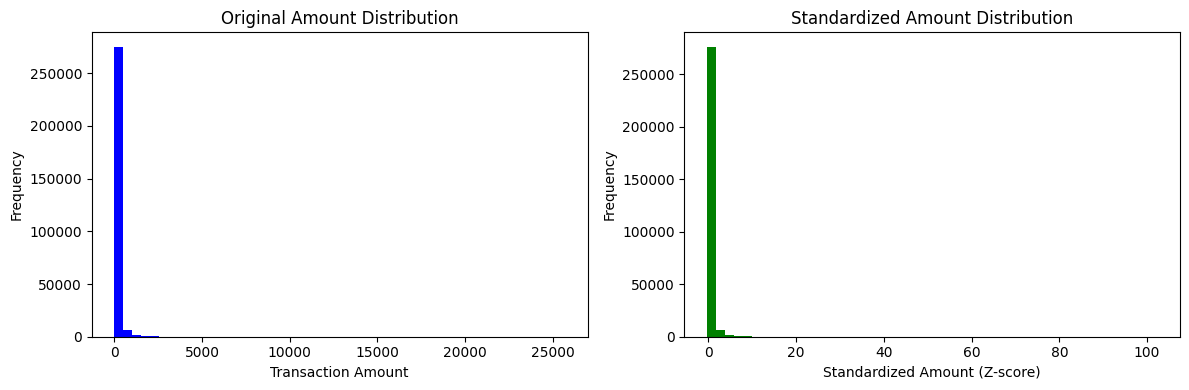

In [56]:
# Histogram chart of Amount before and after Standardization

plt.figure(figsize=(12, 4))

# Before Standardization
plt.subplot(1, 2, 1)
plt.hist(df2['Amount'], bins=50, color='blue')
plt.title('Original Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')

# After Standardization
plt.subplot(1, 2, 2)
plt.hist(X['Amount'], bins=50, color='green')
plt.title('Standardized Amount Distribution')
plt.xlabel('Standardized Amount (Z-score)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Chart Interpretation

**Original Amount Distribution**: <br>
Here, we’re looking at the raw transaction amounts just as they appear in the dataset.

- You’ll notice that most transactions are clustered near the lower amounts, maybe 0 to 500.

- But there are a few transactions that go very high, even above 20,000, these are what we call `outliers`.

The problem with this is that machine learning models might give more attention to big values, even if they’re not fraudulent, just because they’re large. <br><br>

**Standardized Amount Distribution**: <br>
Now this is the same data, but we've used something called Z-score standardization.

- What we did here was rescale the `Amount` values so that they have a mean of 0 and a standard deviation of 1.

- Most of the values are now around zero, while the extreme transactions (either very high or low) are now far from zero.

This helps the machine learning model treat all features fairly, especially when combining Amount with other features like time, frequency, etc.



###  Why This Matters
By standardizing the Amount feature:

- We make the dataset more balanced and fair.

- We help the model focus on patterns, not just large numbers.

- We improve the chances of detecting fraud based on real behavioral signals, not just big transactions.

## Split Dataset

In [60]:
# split the dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Build the Model

In [58]:
# build the machine learning model using the traning dataset of both the independent variables and the target variable
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluate Model

In [59]:
%%time

# Let's evaluate the model we built
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

[[56859     5]
 [   17    81]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.83      0.88        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.9132213415754596


**Comment**: Now we can see that our model performed well with an R0C-AUC Score of 0.91 (91%), showing that our model perfectly distinguishes fraud from non-fraud transactions

### Now, Let's Visualize our Confusion Matrix and ROC Curve on a graph for better understanding 

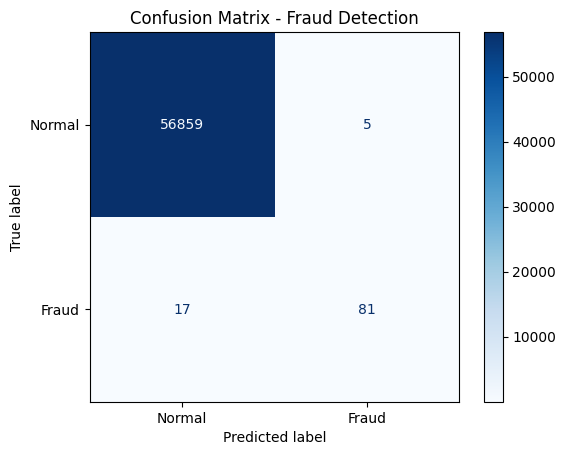

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Let's generate the confusion matrix here
cm = confusion_matrix(y_test, y_pred)

# Display the matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Fraud"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Fraud Detection")
plt.show()

### What is does a Confusion Matrix do?
A confusion matrix is an array with 4 numbers. <br>
`[[TN FP]` <br>
 `[FN TP]]`
 
56859 (TN) = True Negatives (normal transactions correctly predicted)

5 (FP) = False Positives (normal wrongly flagged as fraud)

17 (FN) = False Negatives (fraud missed by the model — very bad!)

81 (TP) = True Positives (fraud correctly caught)

### Plotting the ROC-AUC Curve

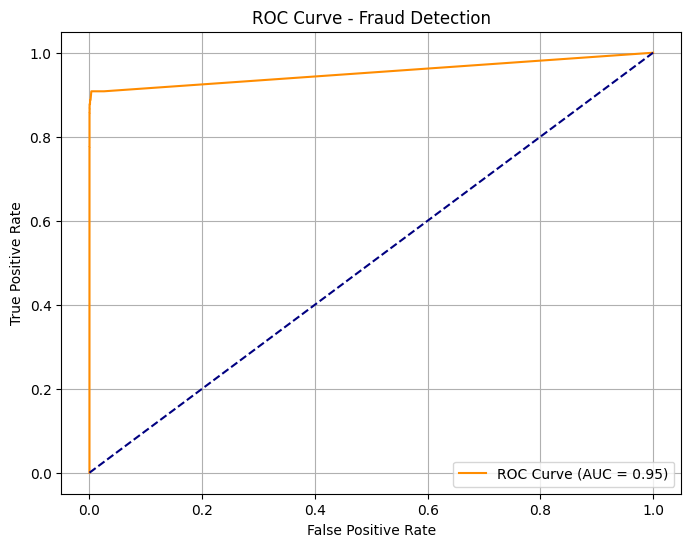

In [62]:
from sklearn.metrics import roc_curve, auc

# Get the probability scores instead of class labels
y_scores = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot the curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # This is a Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Fraud Detection")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


**Comment**: This curve Shows how well our model distinguishes between fraud and non-fraud.

<hr><hr>

## Conclusion

As I wrap up this project, I just want to thank God for the opportunity to learn and apply machine learning to a real-world problem: fraud detection.

In this project, I built a predictive model using a Random Forest Classifier to identify fraudulent transactions in a dataset. The process involved several key steps:

- Cleaning and preparing the data.

- Standardizing features like transaction amount to improve model accuracy.

- Training and evaluating the model using precision, recall, F1-score, and ROC-AUC.

- Visualizing results with confusion matrix and ROC curve to show how well the model performs.

The results showed that the model was able to accurately identify frauds, even in an imbalanced dataset where fraudulent cases are very rare. By using Z-score standardization and stratified train-test splitting, I ensured that the model learned fairly and effectively.

This project has helped me understand not just the technical side of AI, but also its potential to solve real-life problems that affect people and businesses every day.



# THANK YOU!!!